In [1]:
!pip install pandas matplotlib

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('shopping.csv')

# View the first few rows of the dataset
df.head()

,Date,Product,Quantity,Price,Total
0,01/01/2023,Apples,10,0.5,NaN
1,02/01/2023,Bananas,5,0.2,NaN
2,03/01/2023,Oranges,8,0.6,NaN
3,01/02/2023,Apples,12,0.5,NaN
4,05/02/2023,Bananas,7,0.2,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      7 non-null      object 
 1   Product   7 non-null      object 
 2   Quantity  7 non-null      int64  
 3   Price     7 non-null      float64
 4   Total     0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 412.0+ bytes


In [7]:
df.isnull().sum()


Date        0
Product     0
Quantity    0
Price       0
Total       7
dtype: int64

In [9]:
# Calculate the 'Total' column (Price * Quantity)
df['Total'] = df['Price'] * df['Quantity']

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Check the updated dataset
df.head()

,Date,Product,Quantity,Price,Total
0,2023-01-01,Apples,10,0.5,5.0
1,2023-01-02,Bananas,5,0.2,1.0
2,2023-01-03,Oranges,8,0.6,4.8
3,2023-02-01,Apples,12,0.5,6.0
4,2023-02-05,Bananas,7,0.2,1.4


In [11]:
# Add a 'Month' column by extracting the month from the 'Date'
df['Month'] = df['Date'].dt.to_period('M')

# Display the updated dataset
df.head()

,Date,Product,Quantity,Price,Total,Month
0,2023-01-01,Apples,10,0.5,5.0,2023-01
1,2023-01-02,Bananas,5,0.2,1.0,2023-01
2,2023-01-03,Oranges,8,0.6,4.8,2023-01
3,2023-02-01,Apples,12,0.5,6.0,2023-02
4,2023-02-05,Bananas,7,0.2,1.4,2023-02


In [13]:
# Group total sales by product
product_sales = df.groupby('Product')['Total'].sum()
print(product_sales)

Product
Apples     14.0
Bananas     4.2
Oranges     4.8
Name: Total, dtype: float64


In [15]:
# Group total sales by month
monthly_sales = df.groupby('Month')['Total'].sum()
print(monthly_sales)

Month
2023-01    10.8
2023-02     7.4
2023-03     4.8
Freq: M, Name: Total, dtype: float64


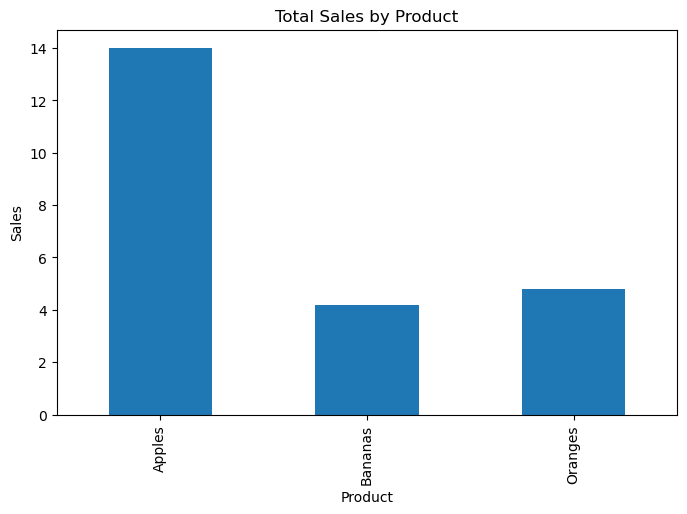

In [17]:
import matplotlib.pyplot as plt

# Bar chart for product sales
product_sales.plot(kind='bar', title='Total Sales by Product', figsize=(8, 5))
plt.ylabel('Sales')
plt.xlabel('Product')
plt.show()

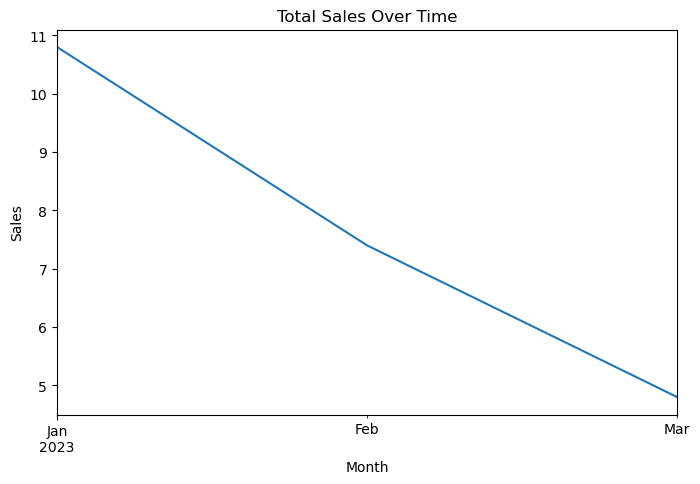

In [19]:
# Line chart for monthly sales
monthly_sales.plot(kind='line', title='Total Sales Over Time', figsize=(8, 5))
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()
